# Diabetes Classification Project

##### Columns Descriptions:
Pregnancies : Number of times the patient has been pregnant.

Glucose : Blood glucose level.

BloodPressure : Blood pressure measurement (mm Hg).

SkinThickness : Thickness of the skin fold (mm), related to body fat.

Insulin : Insulin level in the blood (μU/ml).

BMI : Body Mass Index (weight in kg / height in m²).

DiabetesPedigree : Genetic risk factor (family history of diabetes).

Age : Age of the patient in years.

Outcome : Target variable (0 = No Diabetes, 1 = Has Diabetes).

In [1]:
# import libraries
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.simplefilter("ignore")

In [2]:
df = pd.read_csv("diabetes_data.csv")         # Read Data

#### Explore Data

In [3]:
df.head()                  # dispaly first 5 rows

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
df.shape                   # dispaly shape of data 

(768, 9)

In [5]:
df.info()                  # display general information about data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [6]:
df.describe().T              # statistics info

,count,mean,std,min,25%,50%,75%,max
Pregnancies,768.0,3.845052,3.369578,0.000,1.00000,3.0000,6.00000,17.00
Glucose,768.0,120.894531,31.972618,0.000,99.00000,117.0000,140.25000,199.00
BloodPressure,768.0,69.105469,19.355807,0.000,62.00000,72.0000,80.00000,122.00
SkinThickness,768.0,20.536458,15.952218,0.000,0.00000,23.0000,32.00000,99.00
Insulin,768.0,79.799479,115.244002,0.000,0.00000,30.5000,127.25000,846.00
BMI,768.0,31.992578,7.884160,0.000,27.30000,32.0000,36.60000,67.10
DiabetesPedigreeFunction,768.0,0.471876,0.331329,0.078,0.24375,0.3725,0.62625,2.42
Age,768.0,33.240885,11.760232,21.000,24.00000,29.0000,41.00000,81.00
Outcome,768.0,0.348958,0.476951,0.000,0.00000,0.0000,1.00000,1.00


In [7]:
df['Pregnancies'].value_counts(normalize=True)

Pregnancies
1     0.175781
0     0.144531
2     0.134115
3     0.097656
4     0.088542
5     0.074219
6     0.065104
7     0.058594
8     0.049479
9     0.036458
10    0.031250
11    0.014323
13    0.013021
12    0.011719
14    0.002604
15    0.001302
17    0.001302
Name: proportion, dtype: float64

#### Data Cleaning

In [8]:
df.isnull().sum()                # check null values

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [9]:
df.duplicated().sum()          # check duplicated values

0

#### Analysis

In [10]:
df.corr()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341,0.221898
Glucose,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514,0.466581
BloodPressure,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528,0.065068
SkinThickness,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,0.074752
Insulin,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163,0.130548
BMI,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242,0.292695
DiabetesPedigreeFunction,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561,0.173844
Age,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000,0.238356
Outcome,0.221898,0.466581,0.065068,0.074752,0.130548,0.292695,0.173844,0.238356,1.000000


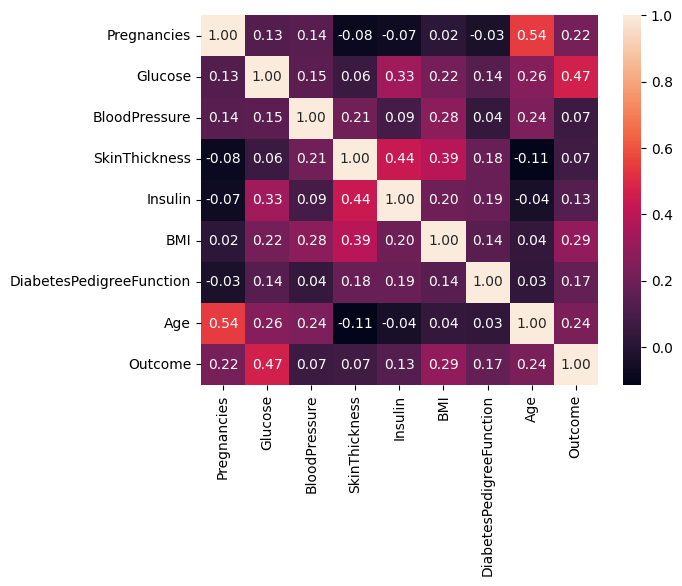

In [11]:
sns.heatmap(df.corr() , annot=True , fmt="0.2f")
plt.show()

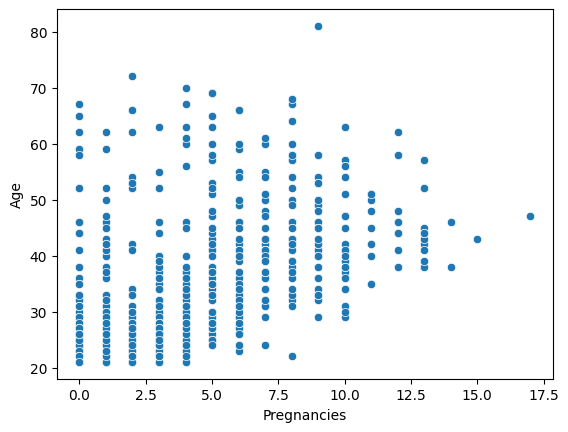

In [12]:
sns.scatterplot(x = 'Pregnancies' , y = 'Age' , data = df)  
plt.show()

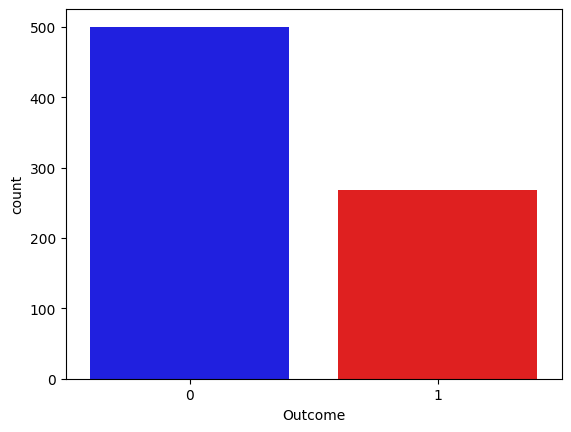

In [13]:
sns.countplot(x=df['Outcome'] , palette=['b','r'] )
plt.show()

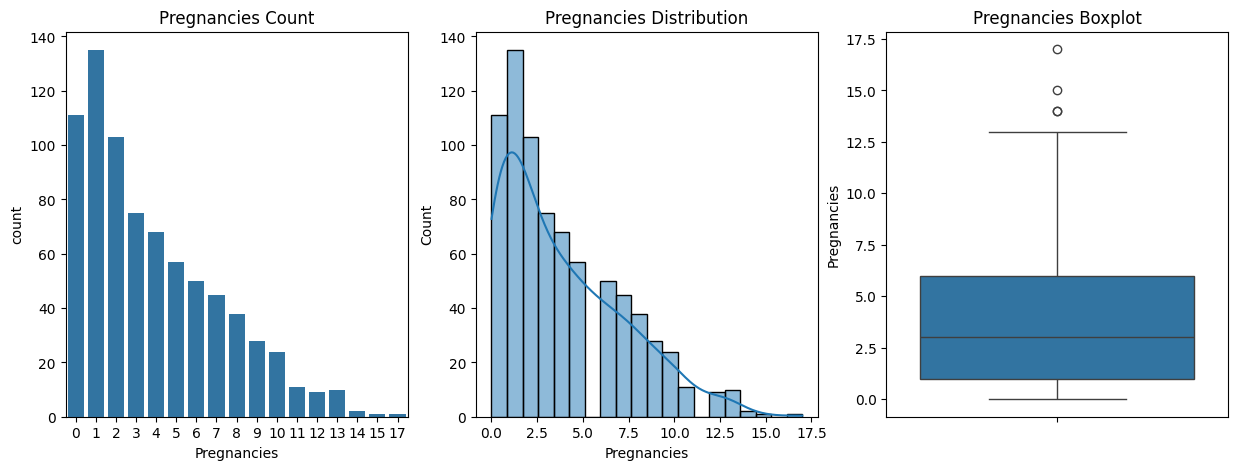

In [14]:
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)  
sns.countplot(data=df, x="Pregnancies")
plt.title("Pregnancies Count")

plt.subplot(1, 3, 2)
sns.histplot(df["Pregnancies"], bins=20, kde=True)
plt.title("Pregnancies Distribution")

plt.subplot(1, 3, 3)
sns.boxplot(y=df["Pregnancies"])
plt.title("Pregnancies Boxplot")

plt.show()

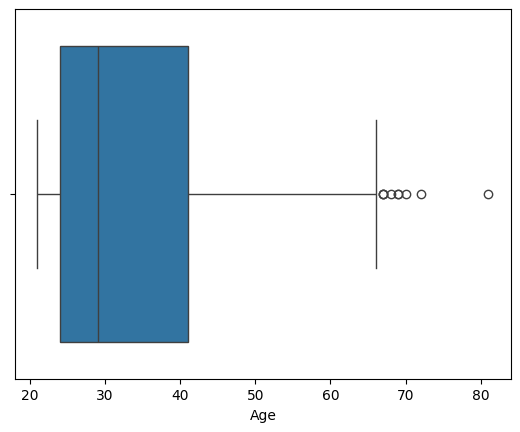

In [15]:
sns.boxplot(x=df['Age'])
plt.show()

#### Model

In [16]:
x = df.drop('Outcome',axis=1)                      # feature
y = df['Outcome']                                  # target

In [17]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier , GradientBoostingClassifier

# Check model Accuracy 
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score , recall_score , f1_score

In [18]:
X_train , X_test , y_train , y_test =  train_test_split(x , y , test_size=0.2 , random_state=42)

In [19]:
model_1 = LogisticRegression()
model_2 = SVC()
model_3 = RandomForestClassifier()
model_4 = GradientBoostingClassifier()

In [20]:
# creat function make the same steps in all models
def info(model) :
    model.fit(X_train , y_train)
    ypredict = model.predict(X_test)
    
    acc = accuracy_score(ypredict,y_test)
    f1 = f1_score(ypredict,y_test)
    recall = recall_score(ypredict,y_test)
    sns.heatmap(confusion_matrix(ypredict,y_test), annot=True)
    
    print(model)
    accuracy = pd.DataFrame({'accuracy' : [acc,f1,recall]} , index=['acc','f1','recall'])
    return accuracy.sort_values(by='accuracy')


LogisticRegression()


,accuracy
recall,0.637931
f1,0.654867
acc,0.746753


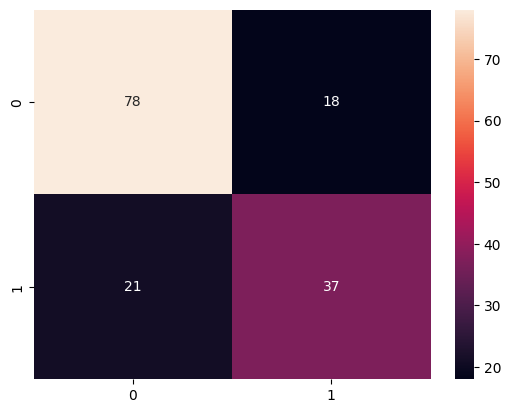

In [21]:
# firt model
info(model_1)

SVC()


,accuracy
f1,0.632653
recall,0.720930
acc,0.766234


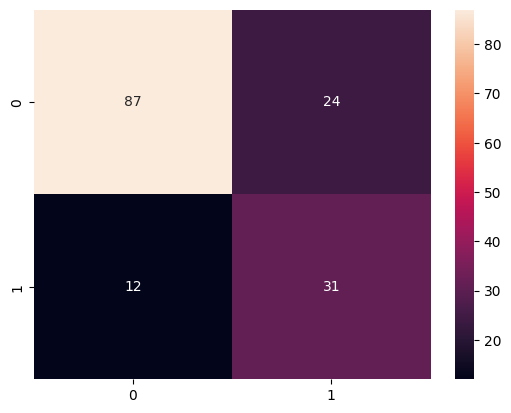

In [22]:
# second model 
info(model_2)    

RandomForestClassifier()


,accuracy
recall,0.637931
f1,0.654867
acc,0.746753


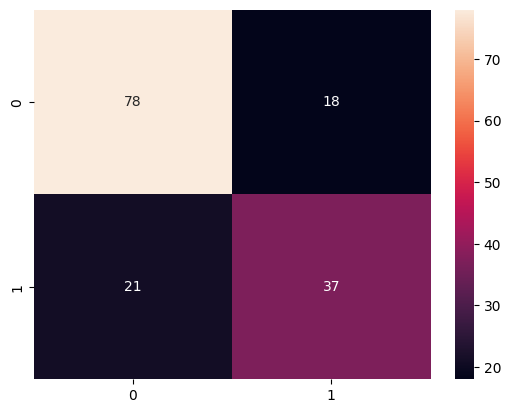

In [23]:
# third model
info(model_3)

GradientBoostingClassifier()


,accuracy
recall,0.627119
f1,0.649123
acc,0.740260


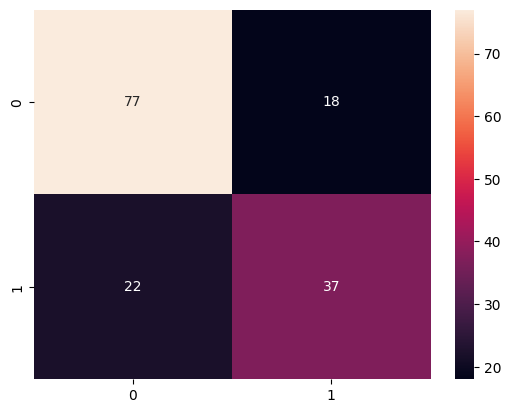

In [24]:
# fourth model
info(model_4)